In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pybaseball as pyb

In [175]:
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
matplotlib.rcParams['font.family'] = "sans-serif"

In [176]:
matplotlib.rcParams['lines.markersize'] ** 2

36.0

In [177]:
lw = pd.read_csv('./logan_webb_stats.csv')
lw.drop(columns=['Unnamed: 0'], inplace=True)

In [178]:
lw['game_date'] = pd.to_datetime(lw['game_date'])

In [179]:
lw

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,score_diff,score_lead
0,FF,2019-08-17,94.3,-1.69,5.64,"Webb, Logan",502481,657277,NaN,ball,...,0,Standard,Standard,211.0,0.000,0.037,NaN,NaN,0,0
1,FF,2019-08-17,94.0,-1.65,5.74,"Webb, Logan",502481,657277,NaN,ball,...,0,Strategic,Standard,215.0,0.000,0.068,NaN,NaN,0,0
2,FF,2019-08-17,94.0,-1.73,5.75,"Webb, Logan",502481,657277,NaN,ball,...,0,Standard,Standard,218.0,0.000,0.136,NaN,NaN,0,0
3,FF,2019-08-17,93.8,-1.74,5.74,"Webb, Logan",502481,657277,NaN,called_strike,...,0,Standard,Standard,216.0,0.000,-0.078,NaN,NaN,0,0
4,FF,2019-08-17,93.9,-1.71,5.72,"Webb, Logan",502481,657277,NaN,foul,...,0,Standard,Standard,214.0,0.000,-0.091,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,FF,2023-09-25,91.9,-1.44,4.97,"Webb, Logan",596847,657277,NaN,called_strike,...,2,Strategic,Standard,236.0,0.000,-0.133,NaN,NaN,1,1
10333,FF,2023-09-25,91.2,-1.33,5.00,"Webb, Logan",596847,657277,NaN,ball,...,2,Strategic,Standard,245.0,0.000,0.023,NaN,NaN,1,1
10334,CH,2023-09-25,88.8,-1.38,4.89,"Webb, Logan",596847,657277,fielders_choice_out,hit_into_play,...,2,Strategic,Standard,264.0,0.286,-0.208,NaN,NaN,1,1
10335,CH,2023-09-25,87.9,-1.42,4.91,"Webb, Logan",595777,657277,NaN,called_strike,...,2,Standard,Standard,266.0,0.000,-0.088,NaN,NaN,1,1


In [180]:
pitch_color_map = {'4-Seam Fastball': 'red', 'Changeup': 'green', 'Cutter': 'blue', 'Sweeper': 'purple', 'Sinker': 'orange'}

In [181]:
year_color_map = {
    2019: 'tab:blue',
    2020: 'tab:green',
    2021: 'tab:orange',
    2022: 'tab:purple',
    2023: 'tab:red'
}

In [182]:
def draw_strike_zone(sz_top=3.5, sz_bot=1.5, ls='k-'):
    plt.plot([-0.708, 0.708], [sz_bot,sz_bot], ls)
    plt.plot([-0.708, -0.708], [sz_bot,sz_top], ls)
    plt.plot([0.708, 0.708], [sz_bot,sz_top], ls)
    plt.plot([-0.708, 0.708], [sz_top,sz_top], ls) 

    return

In [183]:
def draw_home_plate(ls='k-'):
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,-0.3], ls)
    plt.plot([0.708, 0.708], [0,-0.3], ls)
    plt.plot([-0.708, 0], [-0.3, -0.6], ls)
    plt.plot([0.708, 0], [-0.3, -0.6], ls)

    return

# Pitch Release Positions

In [184]:
def distance_from_center_strike_zone(x, y):
    return np.sqrt(x**2 + (y-2.5)**2)

In [185]:
def plot_pitch_release_contour(pitch, year_color_map, alpha=0.6, level=0.9, xlim=(-4, 4), ylim=(-1, 6)):

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    #fig.suptitle(f'{pitch} Release Positions per Year', fontweight='bold')

    #subset = lw[(lw['game_year']==year) & (lw['pitch_name']==pitch)]
    subset = lw[lw['pitch_name']==pitch]

    # left batter
    plt.subplot(1, 2, 1)
    draw_strike_zone()
    draw_home_plate()
    dist_left = {}
    for year, color in year_color_map.items():
        subsubset = subset[(subset['stand']=='L') & (subset['game_year'] == year)]
        # centroid
        x, y = subsubset['release_pos_x'].mean(), subsubset['release_pos_z'].mean()
        dist_left[year] = distance_from_center_strike_zone(x, y)
        # contour
        sns.kdeplot(data = subsubset, x='release_pos_x', y='release_pos_z', levels = [1-level], ax=ax[0], color=color, alpha=alpha)
        plt.scatter(x, y, color=color, label = f'{year}: {dist_left[year]:.2f}ft', s=0.001, alpha=alpha)


    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(loc='upper right', title='Mean Distance from Center of SZ', frameon=False, alignment='right', markerscale=200, handletextpad=0.1, scatteryoffsets=[0.5])
    plt.title('Left-Handed Batter')

    # right batter
    plt.subplot(1, 2, 2)
    draw_strike_zone()
    draw_home_plate()
    dist_right = {}
    for year, color in year_color_map.items():
        subsubset = subset[(subset['stand']=='R') & (subset['game_year'] == year)]
        # centroid
        x, y = subsubset['release_pos_x'].mean(), subsubset['release_pos_z'].mean()
        dist_right[year] = distance_from_center_strike_zone(x, y)
        # contour
        sns.kdeplot(data = subsubset, x='release_pos_x', y='release_pos_z', levels = [1-level], ax=ax[1], color=color, alpha=alpha)
        plt.scatter(x, y, color=color, label = f'{year}: {dist_right[year]:.2f}ft', s=0.001, alpha=alpha)

    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(loc='upper right', title='Mean Distance from Center of SZ', frameon=False, alignment='right', markerscale=200, handletextpad=0.1, scatteryoffsets=[0.5])
    plt.title('Right-Handed Batter')

    
    plt.subplots_adjust(wspace=0, hspace=0) 
    plt.show()

    return

### Changeup

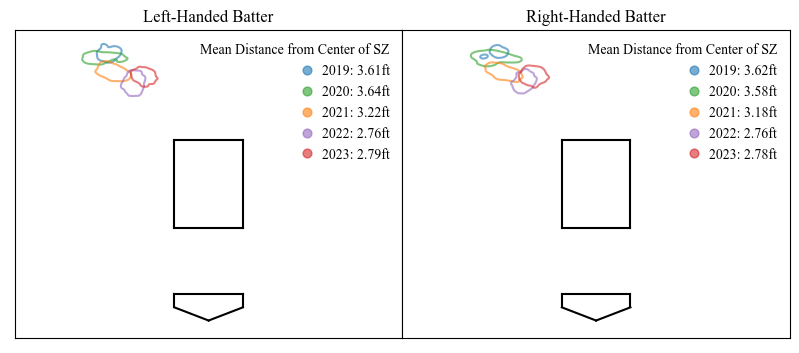

In [186]:
plot_pitch_release_contour('Changeup', year_color_map)

### Sweeper

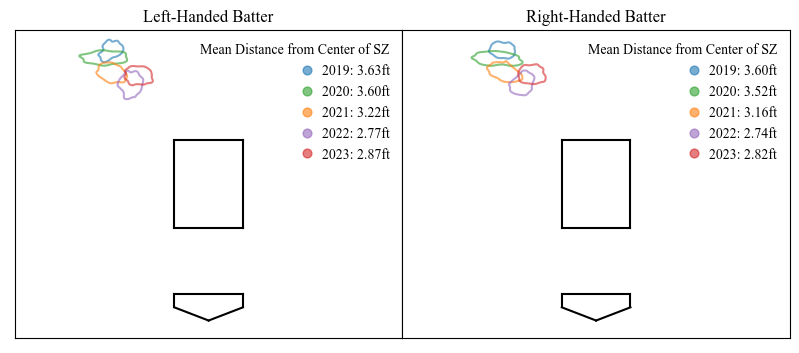

In [187]:
plot_pitch_release_contour('Sweeper', year_color_map)

### Sinker

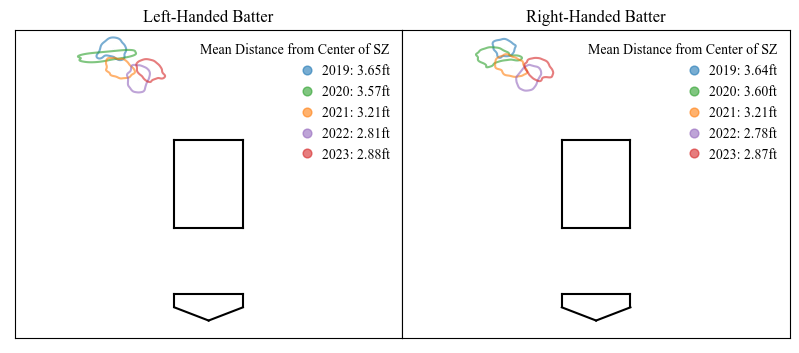

In [188]:
plot_pitch_release_contour('Sinker', year_color_map)

### 4-Seam Fastball

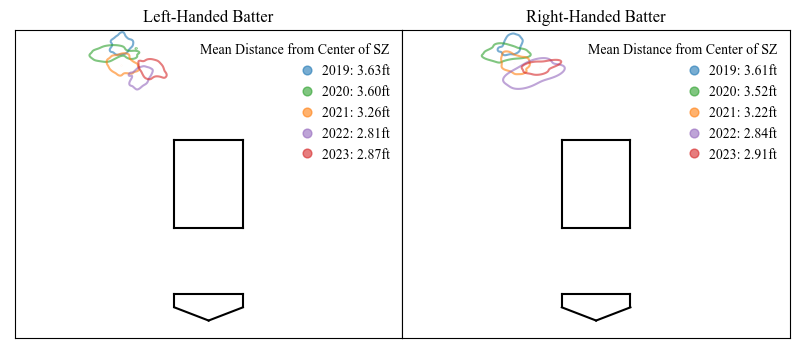

In [189]:
plot_pitch_release_contour('4-Seam Fastball', year_color_map)

In [190]:
def plot_pitch_location_contour(pitch, year_color_map, alpha=0.6, level=0.9, xlim=(-4, 4), ylim=(-1, 4.5)):

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    #fig.suptitle(f'{pitch} Locations per Year')

    #subset = lw[(lw['game_year']==year) & (lw['pitch_name']==pitch)]
    subset = lw[lw['pitch_name']==pitch]

    # left batter
    plt.subplot(1, 2, 1)
    draw_strike_zone()
    draw_home_plate()
    for year, color in year_color_map.items():
        subsubset = subset[(subset['stand']=='L') & (subset['game_year'] == year)]
        # contour
        sns.kdeplot(data = subsubset, x='plate_x', y='plate_z', levels = [1-level], ax=ax[0], color=color, alpha=alpha)
        # centroid
        x, y = subsubset['plate_x'].mean(), subsubset['plate_z'].mean()
        plt.scatter(x, y, color=color, label = year, alpha=alpha)

    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(loc='upper right', handletextpad=0.1, scatteryoffsets=[0.5])
    plt.title('Left-Handed Batter')

    # right batter
    plt.subplot(1, 2, 2)
    draw_strike_zone()
    draw_home_plate()
    for year, color in year_color_map.items():
        subsubset = subset[(subset['stand']=='R') & (subset['game_year'] == year)]
        # contour
        sns.kdeplot(data = subsubset, x='plate_x', y='plate_z', levels = [1-level], ax=ax[1], color=color, alpha=alpha)
        # centroid
        x, y = subsubset['plate_x'].mean(), subsubset['plate_z'].mean()
        plt.scatter(x, y, color=color, label = year, alpha=alpha)

    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(loc='upper right', handletextpad=0.1, scatteryoffsets=[0.5])
    plt.title('Right-Handed Batter')

    
    plt.subplots_adjust(wspace=0, hspace=0) 
    plt.show()

    return

### Changeup

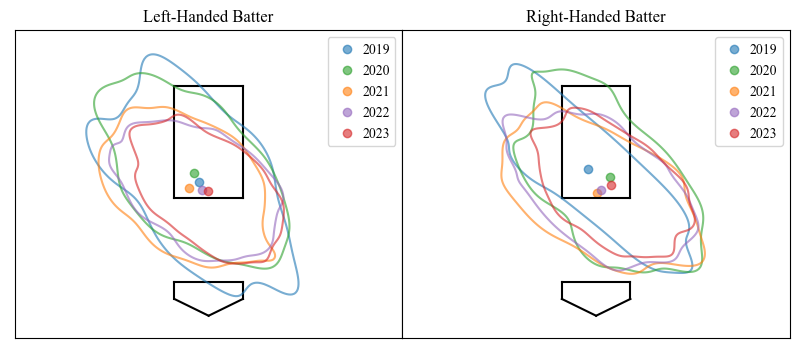

In [191]:
plot_pitch_location_contour('Changeup', year_color_map, 0.6)

### Sweeper

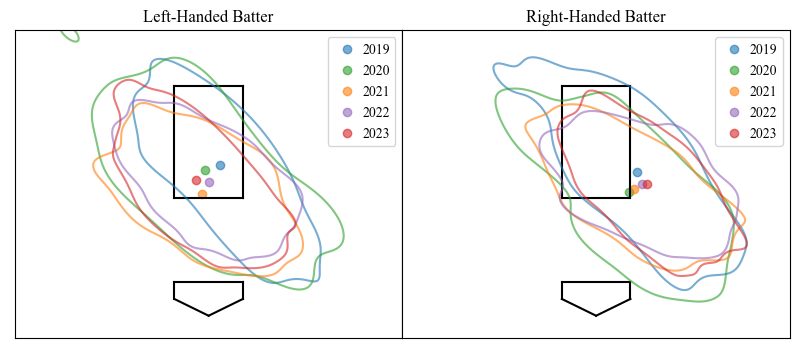

In [192]:
plot_pitch_location_contour('Sweeper', year_color_map, 0.6)

### Sinker

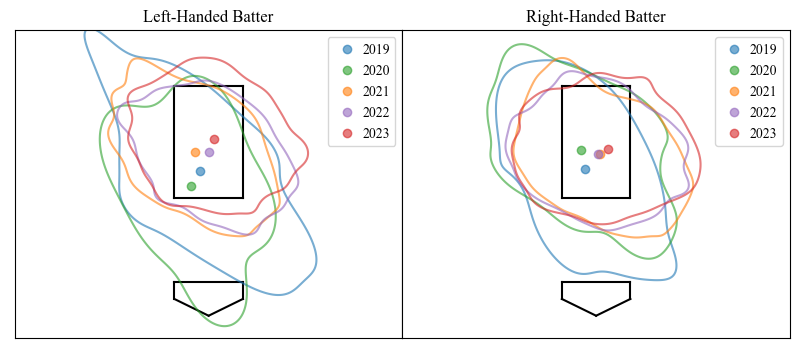

In [193]:
plot_pitch_location_contour('Sinker', year_color_map, 0.6)

### 4-Seam Fastball

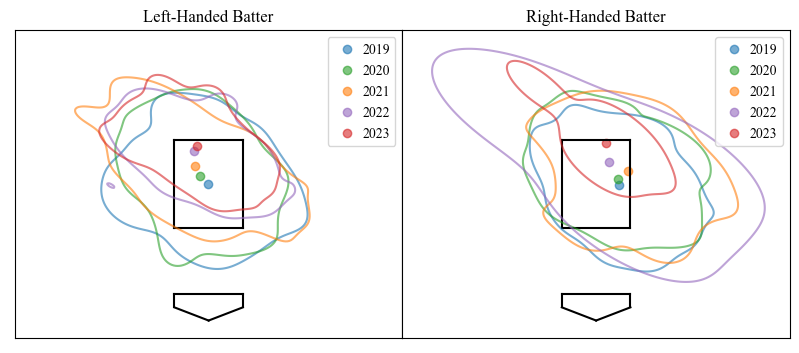

In [194]:
plot_pitch_location_contour('4-Seam Fastball', year_color_map, 0.6, ylim=(-1, 6))

### Pitch Movement

In [195]:
def plot_pitch_movement(pitch):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    #fig.suptitle(f'{pitch} Movement per Year')

    sns.boxplot(data=lw[lw['pitch_name']==pitch], x='game_year', y='pfx_x', ax=ax[0], hue='game_year', palette=year_color_map, dodge=False)
    ax[0].set_ylabel('Horizontal Movement (ft)')
    ax[0].set_xlabel('Year')
    ax[0].get_legend().remove()



    sns.boxplot(data=lw[lw['pitch_name']==pitch], x='game_year', y='pfx_z', ax=ax[1], hue='game_year', palette=year_color_map, dodge=False)
    ax[1].set_ylabel('Vertical Movement (ft)')
    ax[1].set_xlabel('Year')
    ax[1].get_legend().remove()

    plt.show()

    return

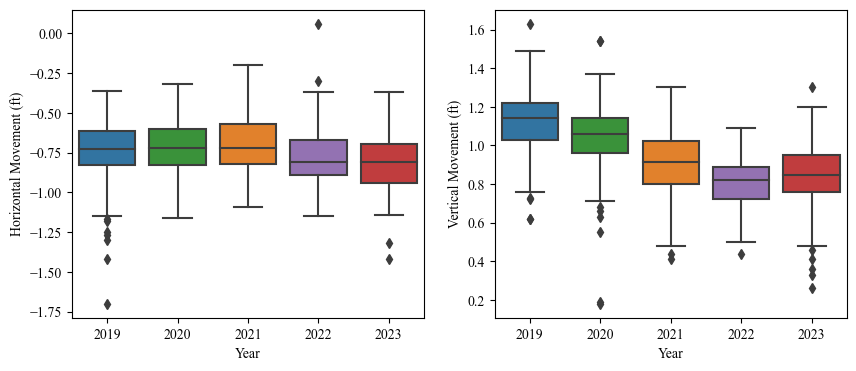

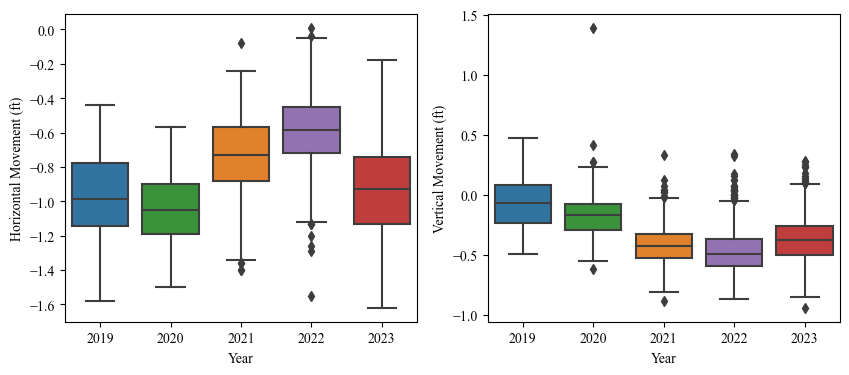

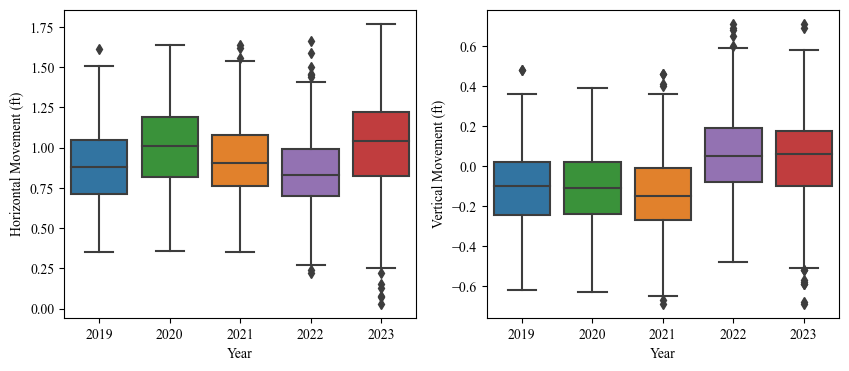

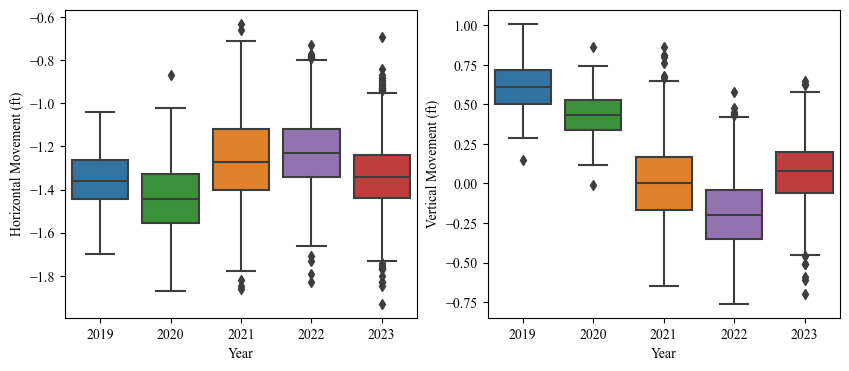

In [196]:
for pitch in ['4-Seam Fastball', 'Changeup', 'Sweeper', 'Sinker']:
    plot_pitch_movement(pitch)